**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [11]:
# Specify the file path and encoding
file_path = '/content/Instagram data.csv'
file_encoding = 'latin1'  # or 'ISO-8859-1'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, encoding=file_encoding)

In [16]:
# Display the DataFrame
print(df.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

#Exploratory Data Analysis (EDA):

In [22]:
# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB
None


In [23]:

# Display summary statistics
print(df.describe())


        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.08

In [24]:

# Check for missing values
print(df.isnull().sum())


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


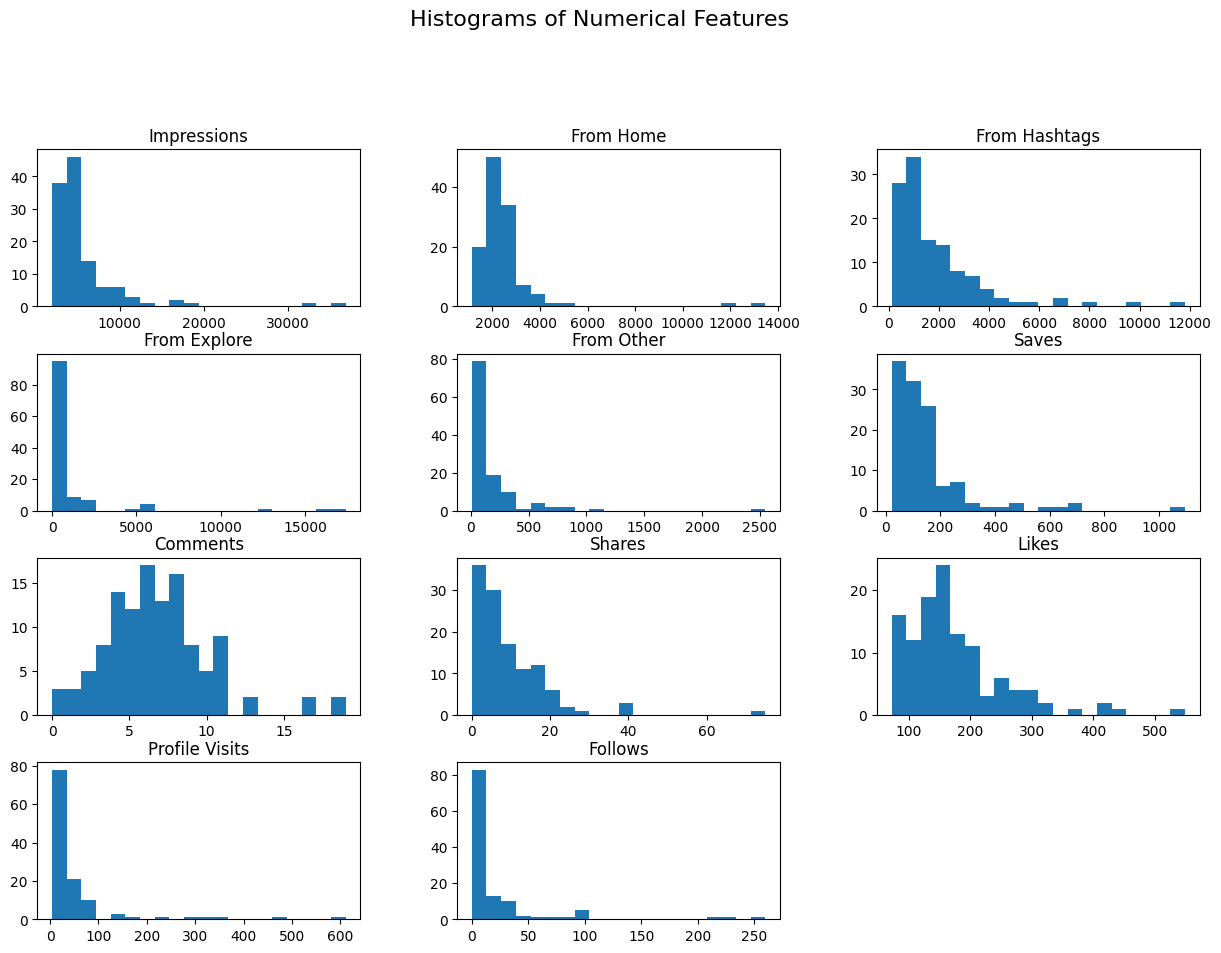

In [25]:

# Visualize data distributions using histograms
df.hist(figsize=(15, 10), bins=20, grid=False)
plt.suptitle('Histograms of Numerical Features', y=1.02, size=16)
plt.show()



<ipython-input-26-dc1818b5c786>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


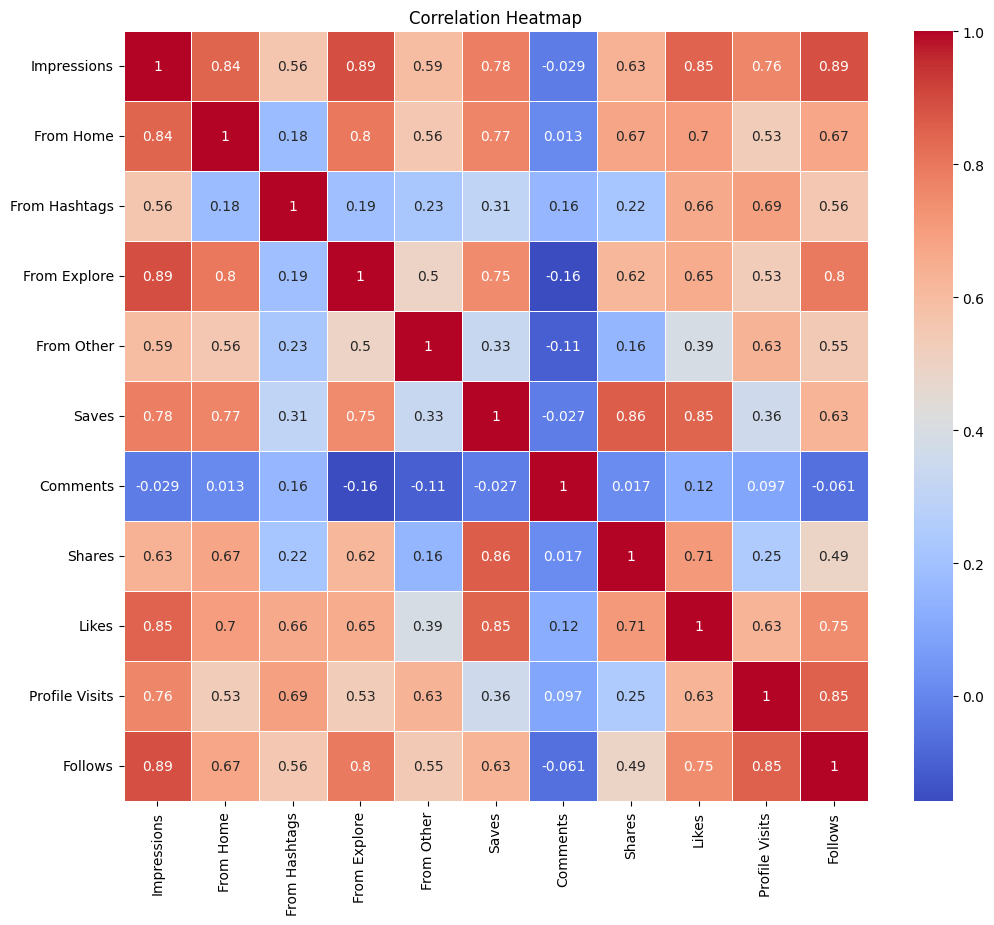

In [26]:

# Visualize correlations between variables using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


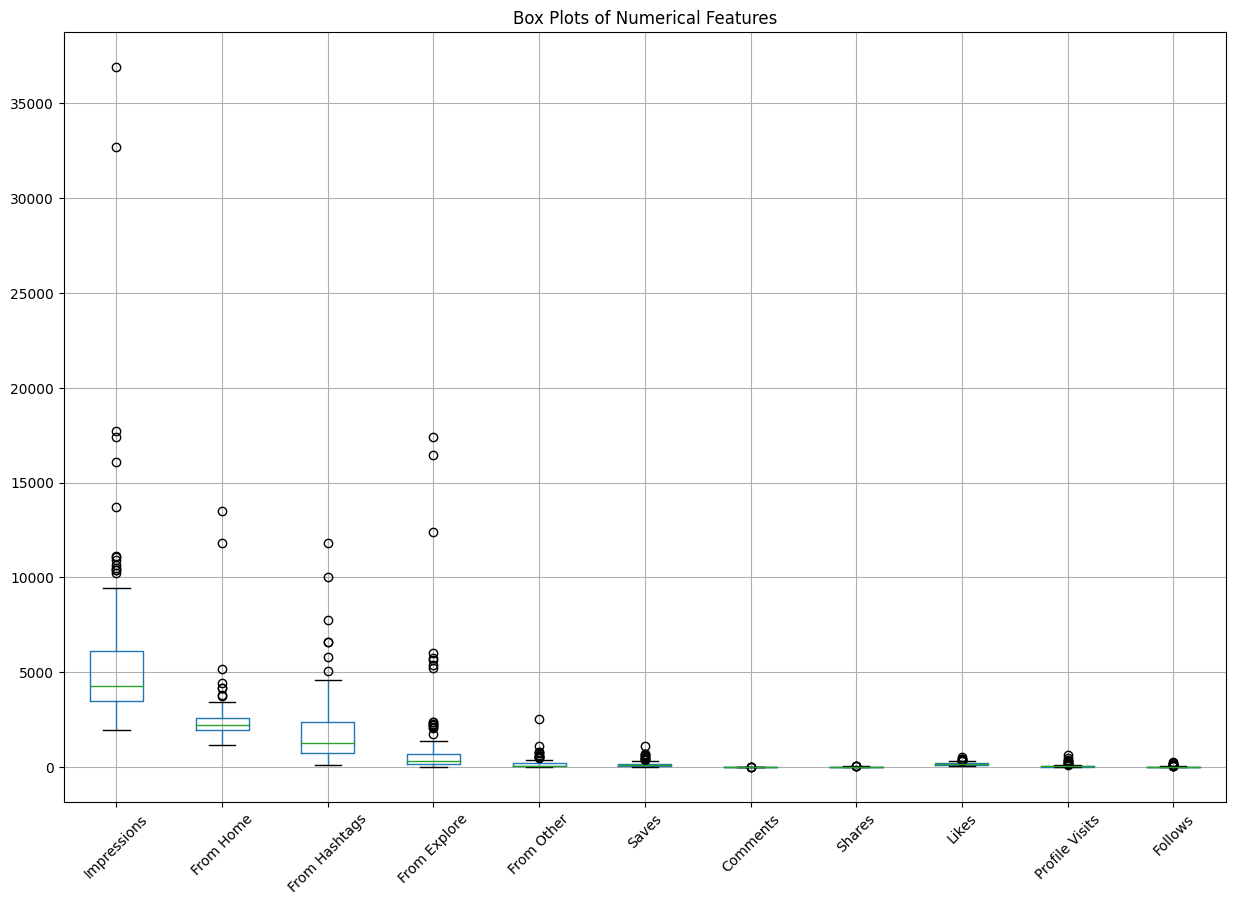

In [27]:

# Box plots for numerical features to identify outliers
plt.figure(figsize=(15, 10))
df.boxplot(rot=45)
plt.title('Box Plots of Numerical Features')
plt.show()

# Data Cleaning and Preprocessing:

In [28]:
# Drop duplicates if any
df = df.drop_duplicates()


In [29]:

# Handle missing values (replace with appropriate strategy)
# For numerical columns, you can use mean or median
df.fillna(df.mean(), inplace=True)

# Check for missing values again
print(df.isnull().sum())


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


<ipython-input-29-5b8a50b2469b>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [32]:
# Handle outliers (you can choose to remove or transform them)
# For example, winsorize the data to limit extreme values
from scipy.stats import mstats

# Extract numeric columns for winsorization
numeric_columns = df.select_dtypes(include='number').columns

# Loop through numeric columns and winsorize
for column in numeric_columns:
    df[column] = mstats.winsorize(df[column], limits=[0.05, 0.05])

# Display the DataFrame after winsorization
print(df.head())


   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188            45         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [35]:

# Standardize or normalize data if necessary
# Using Min-Max scaling as an example
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mstats

# Extract numeric columns for winsorization
numeric_columns = df.select_dtypes(include='number').columns

# Loop through numeric columns and winsorize
for column in numeric_columns:
    df[column] = mstats.winsorize(df[column], limits=[0.05, 0.05])

# Extract non-numeric columns to keep them unchanged
non_numeric_columns = df.select_dtypes(exclude='number').columns
df_non_numeric = df[non_numeric_columns]

# Use Min-Max scaling to normalize the winsorized data for numeric columns
scaler = MinMaxScaler()
df_normalized_numeric = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Combine the non-numeric columns and the normalized numeric columns
df_normalized = pd.concat([df_non_numeric, df_normalized_numeric], axis=1)

# Transform variables or create new features if needed
# For example, you might want to create an engagement rate feature
df_normalized['Engagement Rate'] = (df_normalized['Likes'] + df_normalized['Shares'] + df_normalized['Comments'] + df_normalized['Follows']) / df_normalized['Impressions']

# Ensure data consistency and integrity (check for unexpected values)
# For example, check if 'Caption' and 'Hashtags' have consistent formats

# Display cleaned and preprocessed DataFrame
print(df_normalized.head())


                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  Impressions  From Home  \
0  #finance #money #business #investing #investme...     0.133977   0.504242   
1  #healthcare #health #covid #data #datascience ...     0.264500   0.561212   
2  #data #datascience #dataanalysis #dataanalytic...     0.142920   0.301818   
3  #python #pythonprogramming #pythonprojects #py...     0.187815   0.550303   
4  #datavisualization #datascience #data #dataana...     0.009829   0.147879   

   From Hashtags  From Explore  From Other     Saves  Comments    Shares  \
0       0.146053      0.102702    0.055205  0.145161       0.8  0.181818   
1       0.291033      0.202004

# Data Visualization:

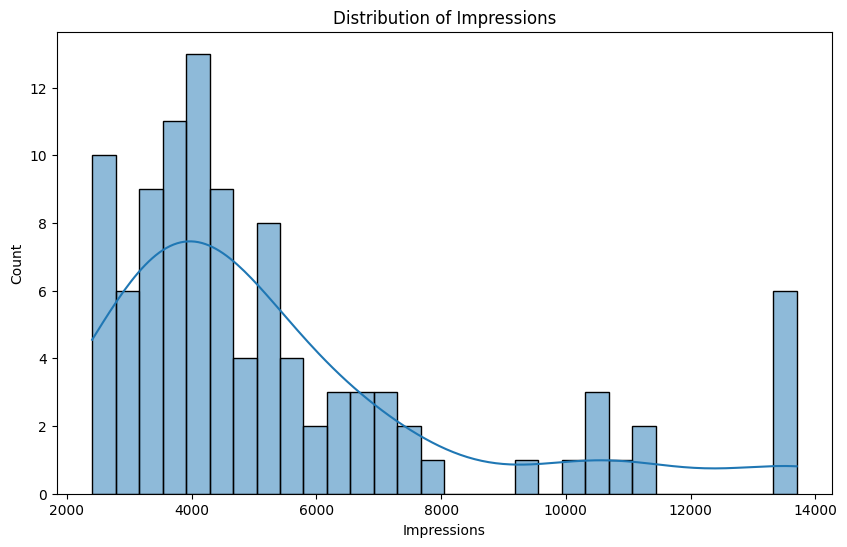

In [37]:
# Visualize the distribution of 'Impressions'
plt.figure(figsize=(10, 6))
sns.histplot(df['Impressions'], bins=30, kde=True)
plt.title('Distribution of Impressions')
plt.show()


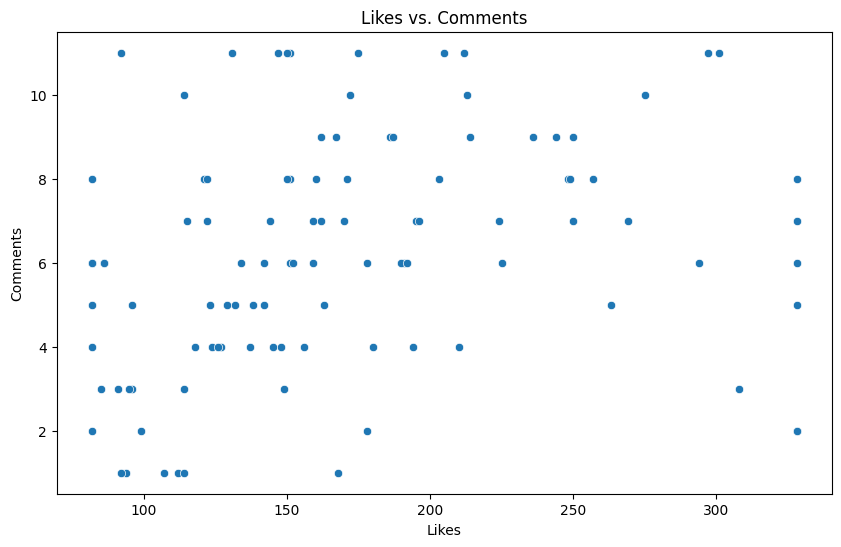

In [38]:
# Visualize the relationship between 'Likes' and 'Comments'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Comments', data=df)
plt.title('Likes vs. Comments')
plt.show()


# Visualize the correlation between numerical **columns**

<ipython-input-39-032efdfaf6ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


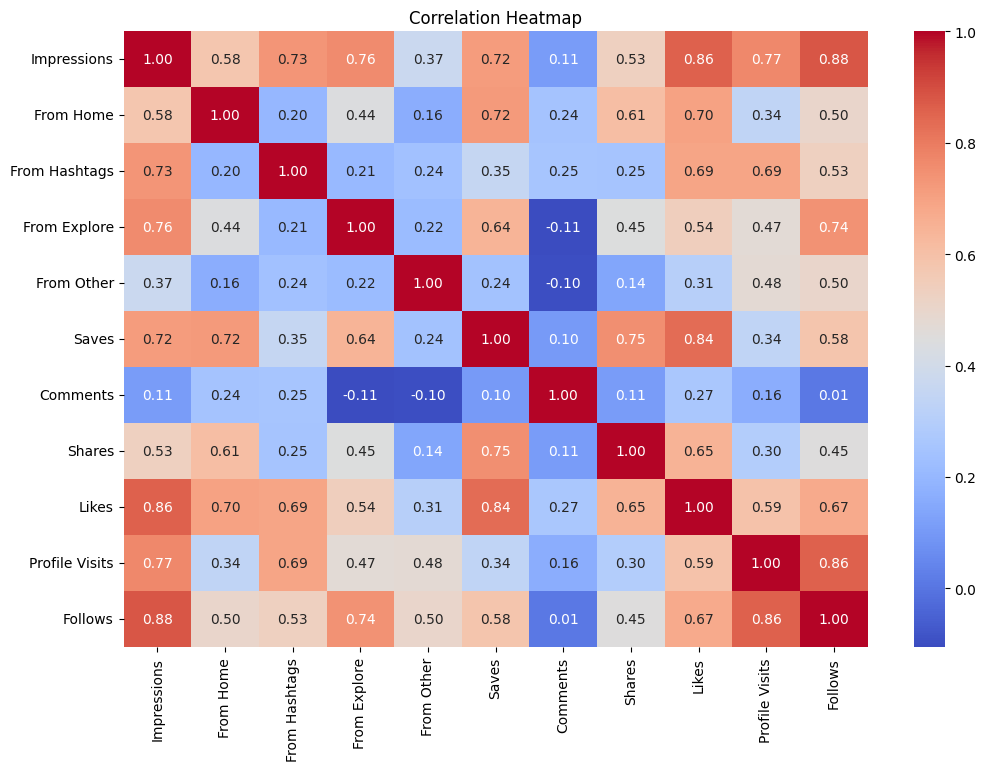

In [39]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


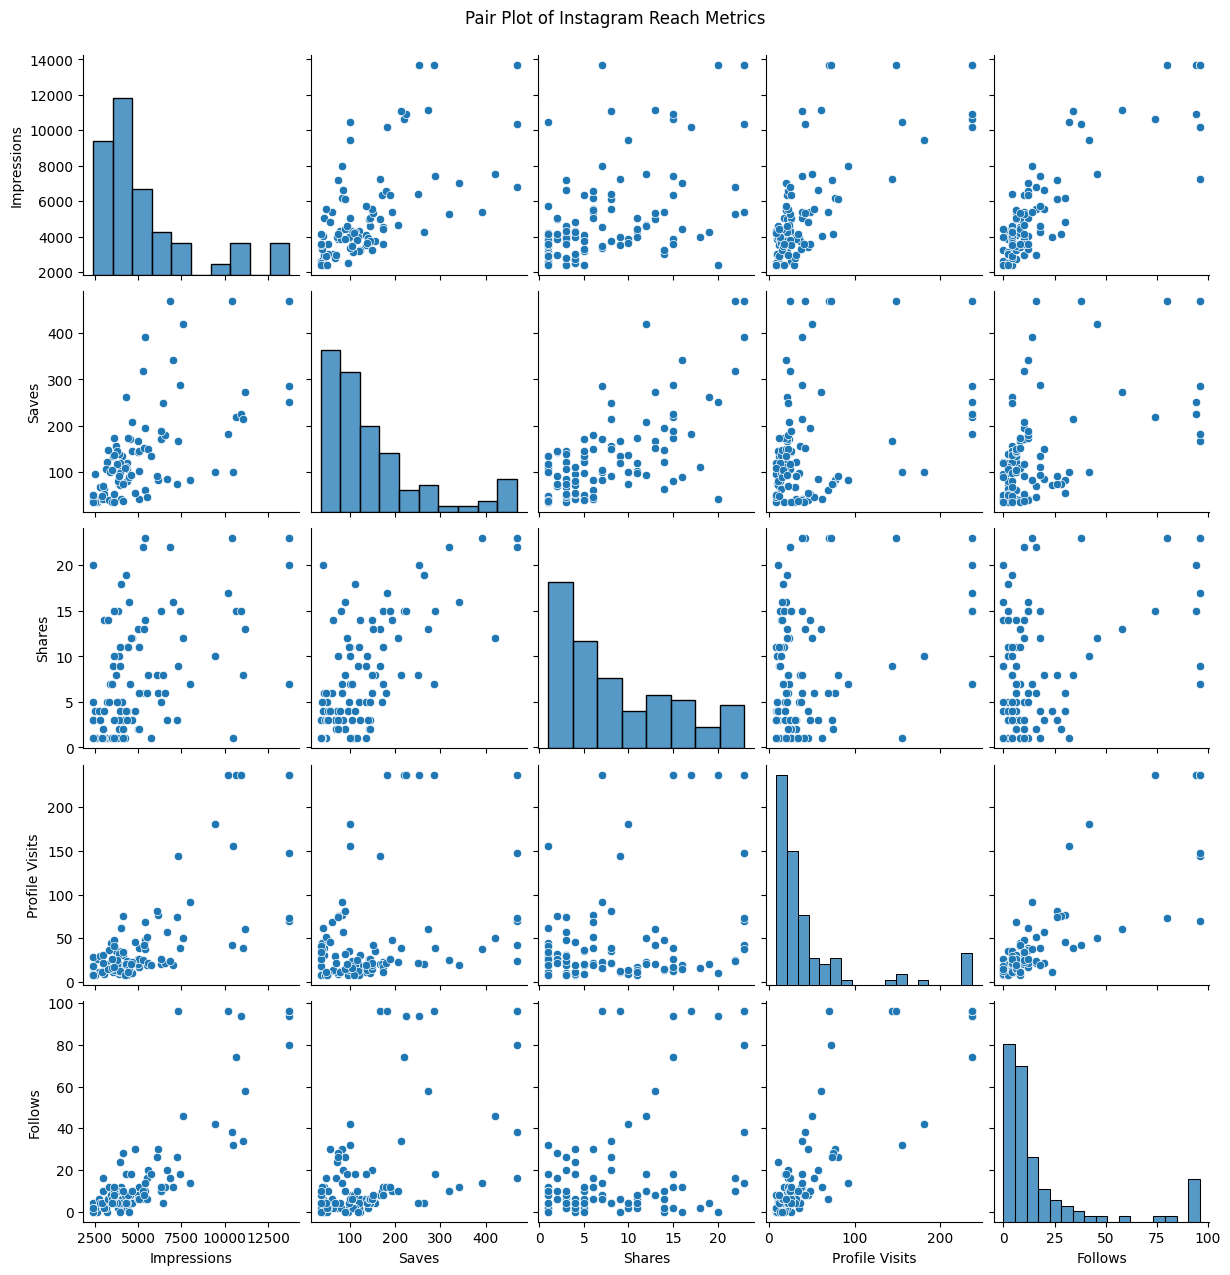

In [45]:
reach_metrics = df[['Impressions', 'Saves', 'Shares', 'Profile Visits', 'Follows']]

sns.pairplot(reach_metrics)
plt.suptitle('Pair Plot of Instagram Reach Metrics', y=1.02)
plt.show()


In [53]:
# Display the columns in your DataFrame
print(df.columns)


Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')


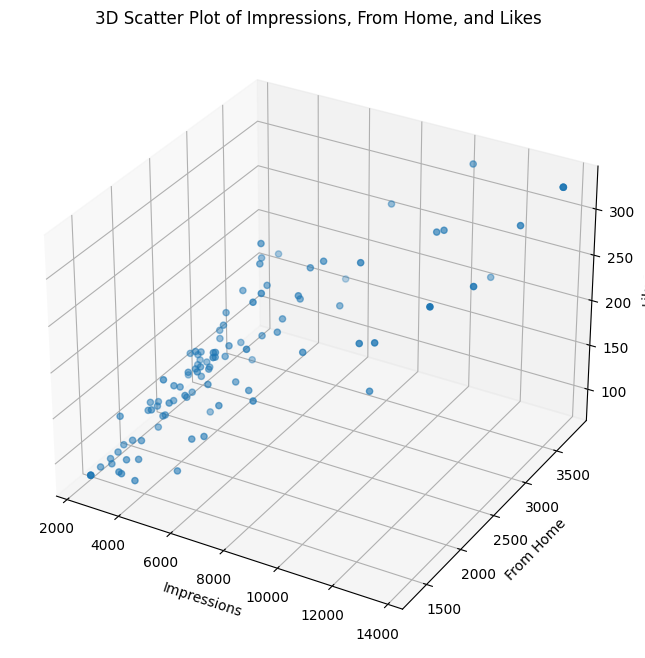

In [60]:
# 3D Scatter plot for 'Impressions', 'From Home', and 'Likes'
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Impressions'], df['From Home'], df['Likes'])
ax.set_xlabel('Impressions')
ax.set_ylabel('From Home')
ax.set_zlabel('Likes')
plt.title('3D Scatter Plot of Impressions, From Home, and Likes')
plt.show()


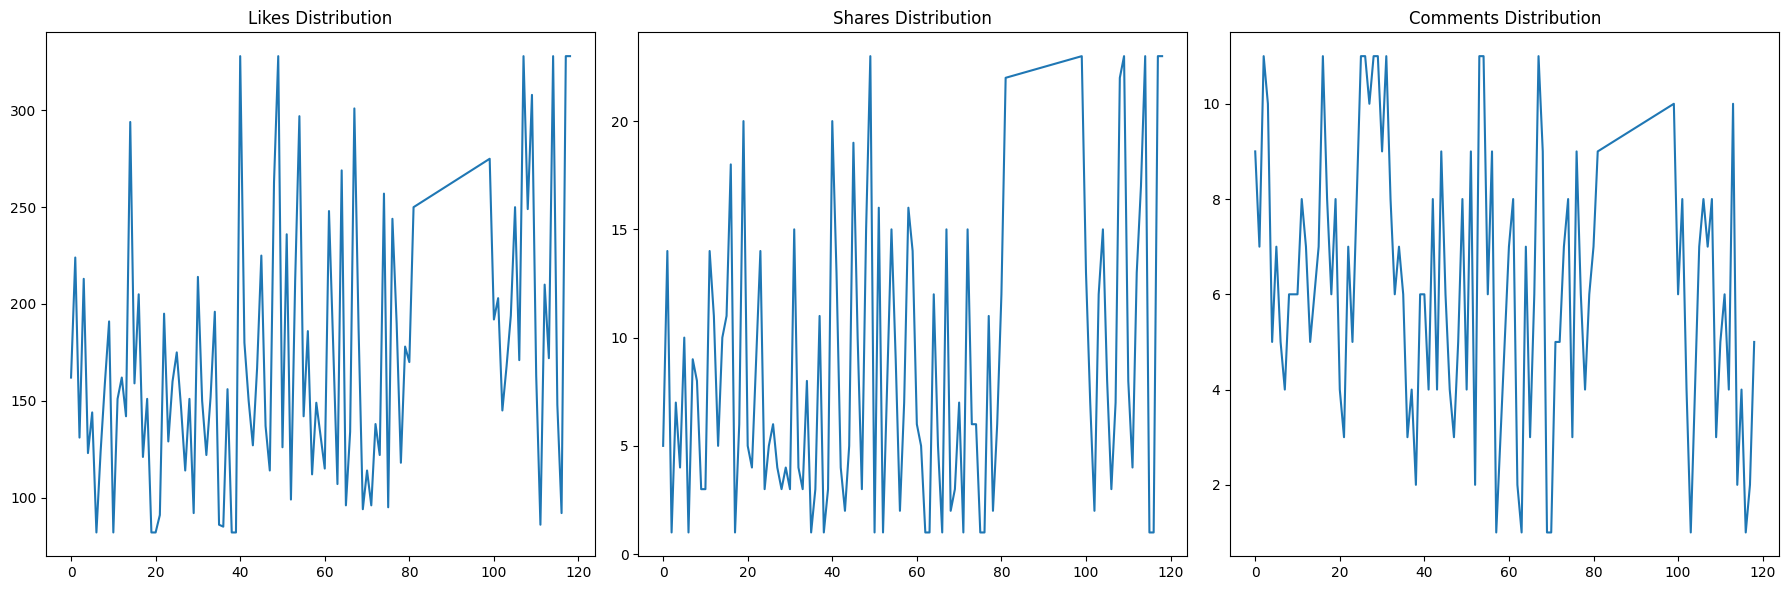

In [61]:
# Subplots for 'Likes', 'Shares', and 'Comments'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
df['Likes'].plot(ax=axes[0], title='Likes Distribution')
df['Shares'].plot(ax=axes[1], title='Shares Distribution')
df['Comments'].plot(ax=axes[2], title='Comments Distribution')
plt.tight_layout()
plt.show()


In [62]:
import altair as alt

alt.Chart(df).mark_circle().encode(
    x='Likes',
    y='Comments',
    color='Category:N',
    size='Impressions'
).interactive()


alt.Chart(...)

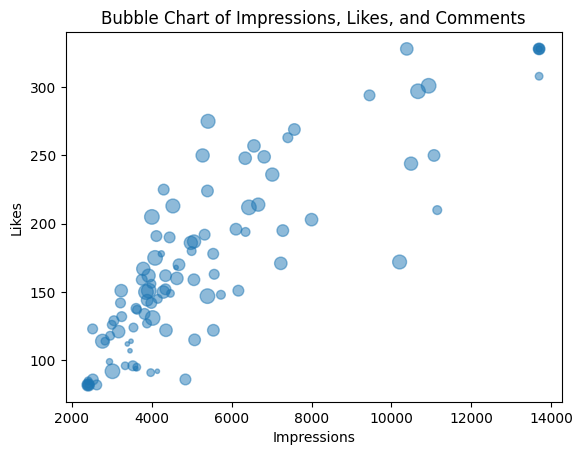

In [63]:
# Bubble chart for 'Impressions', 'Likes', and 'Comments'
plt.scatter(df['Impressions'], df['Likes'], s=df['Comments']*10, alpha=0.5)
plt.xlabel('Impressions')
plt.ylabel('Likes')
plt.title('Bubble Chart of Impressions, Likes, and Comments')
plt.show()


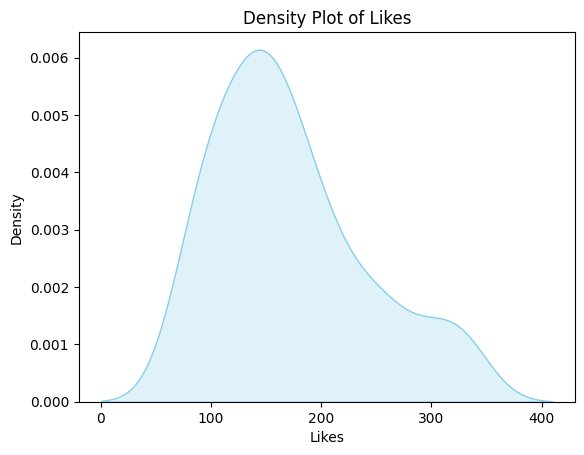

In [65]:
# Density plot for 'Likes'
sns.kdeplot(df['Likes'], fill=True, color='skyblue')
plt.xlabel('Likes')
plt.ylabel('Density')
plt.title('Density Plot of Likes')
plt.show()


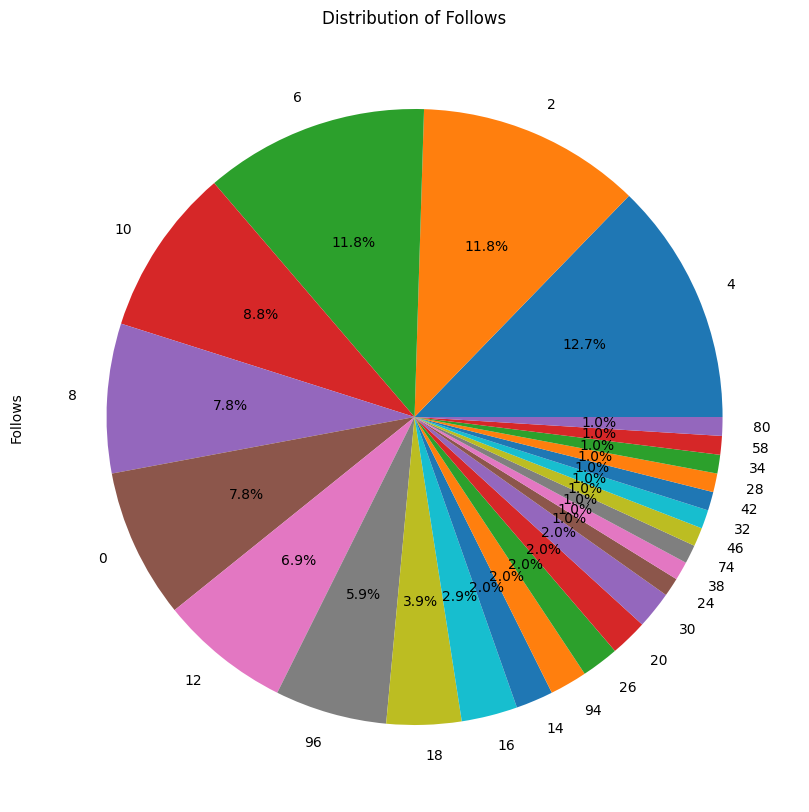

In [71]:
# Pie chart for 'Follows'
df['Follows'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10, 10))
plt.title('Distribution of Follows')
plt.show()


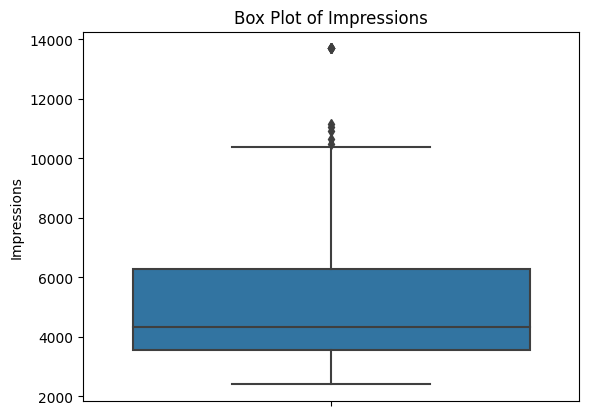

In [72]:
# Box plot for 'Impressions'
sns.boxplot(y='Impressions', data=df)
plt.title('Box Plot of Impressions')
plt.show()


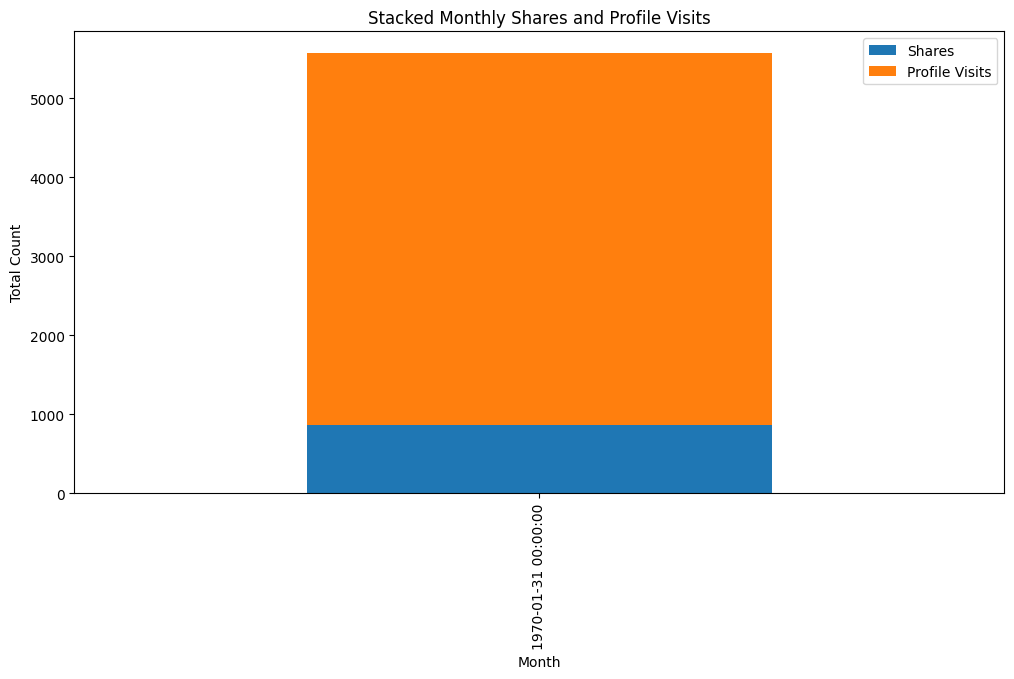

In [77]:
# Convert the existing column to datetime if it's not already
df_reset['index'] = pd.to_datetime(df_reset['index'])

# Set the 'index' column as the index of the DataFrame
df_reset.set_index('index', inplace=True)

# Now, you can use the datetime index for resampling
df_reset[['Shares', 'Profile Visits']].resample('M').sum().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Monthly Shares and Profile Visits')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.show()


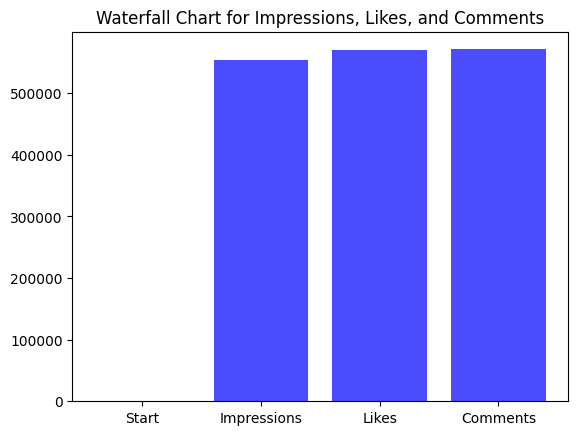

In [78]:
import matplotlib.pyplot as plt

# Assuming 'Impressions', 'Likes', 'Comments' columns in your DataFrame
values = [df['Impressions'].sum(), df['Likes'].sum(), df['Comments'].sum()]

# Calculate the cumulative sum for the waterfall chart
cumsum_values = [0] + list(np.cumsum(values))

# Create the waterfall chart
plt.bar(range(len(cumsum_values)), cumsum_values, color='blue', alpha=0.7)
plt.xticks(range(len(cumsum_values)), ['Start', 'Impressions', 'Likes', 'Comments'])
plt.title('Waterfall Chart for Impressions, Likes, and Comments')
plt.show()


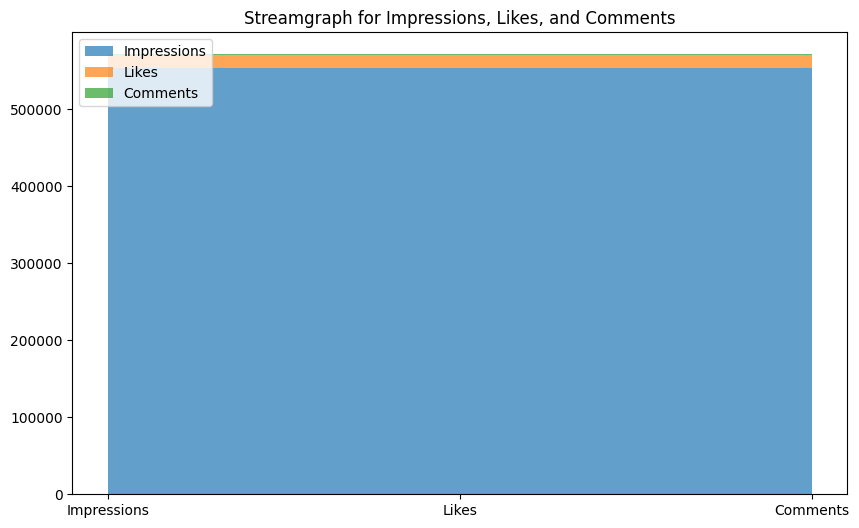

In [80]:
# Assuming 'Impressions', 'Likes', 'Comments' columns in your DataFrame
categories = ['Impressions', 'Likes', 'Comments']
values = [df[col].sum() for col in categories]

# Create a Streamgraph
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(range(len(categories)), *values, labels=categories, alpha=0.7)
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
ax.set_title('Streamgraph for Impressions, Likes, and Comments')
ax.legend(loc='upper left')
plt.show()


In [81]:
import plotly.graph_objects as go

# Assuming 'Likes' and 'Comments' columns in your DataFrame
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Likes'],
                high=df['Likes'],
                low=df['Comments'],
                close=df['Comments'])])

fig.update_layout(title='Candlestick Chart for Likes and Comments',
                  xaxis_title='Date',
                  yaxis_title='Count')
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



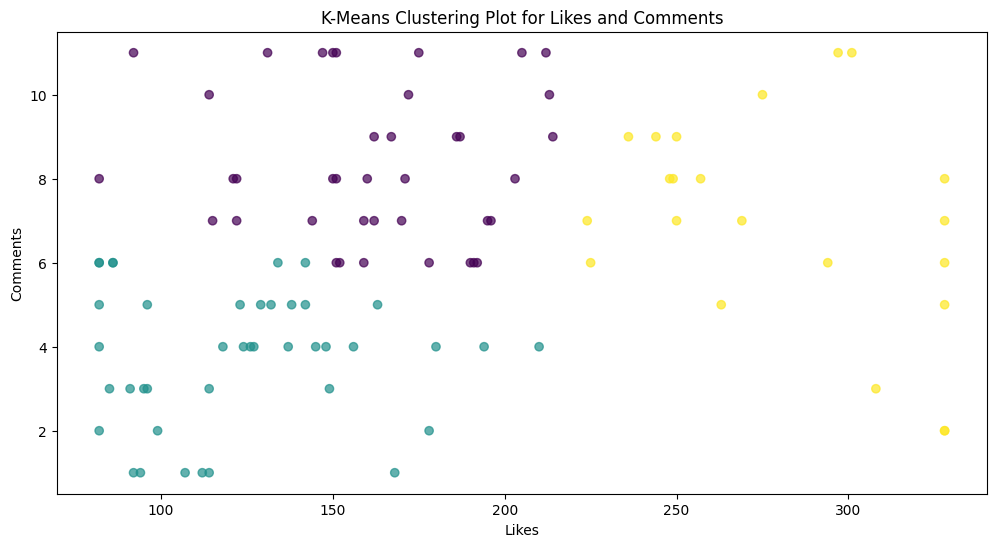

In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns for clustering
data_for_clustering = df[['Likes', 'Comments']]

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_for_clustering)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_standardized)

# Create a scatter plot for K-Means clustering
plt.figure(figsize=(12, 6))
plt.scatter(df['Likes'], df['Comments'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering Plot for Likes and Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.show()


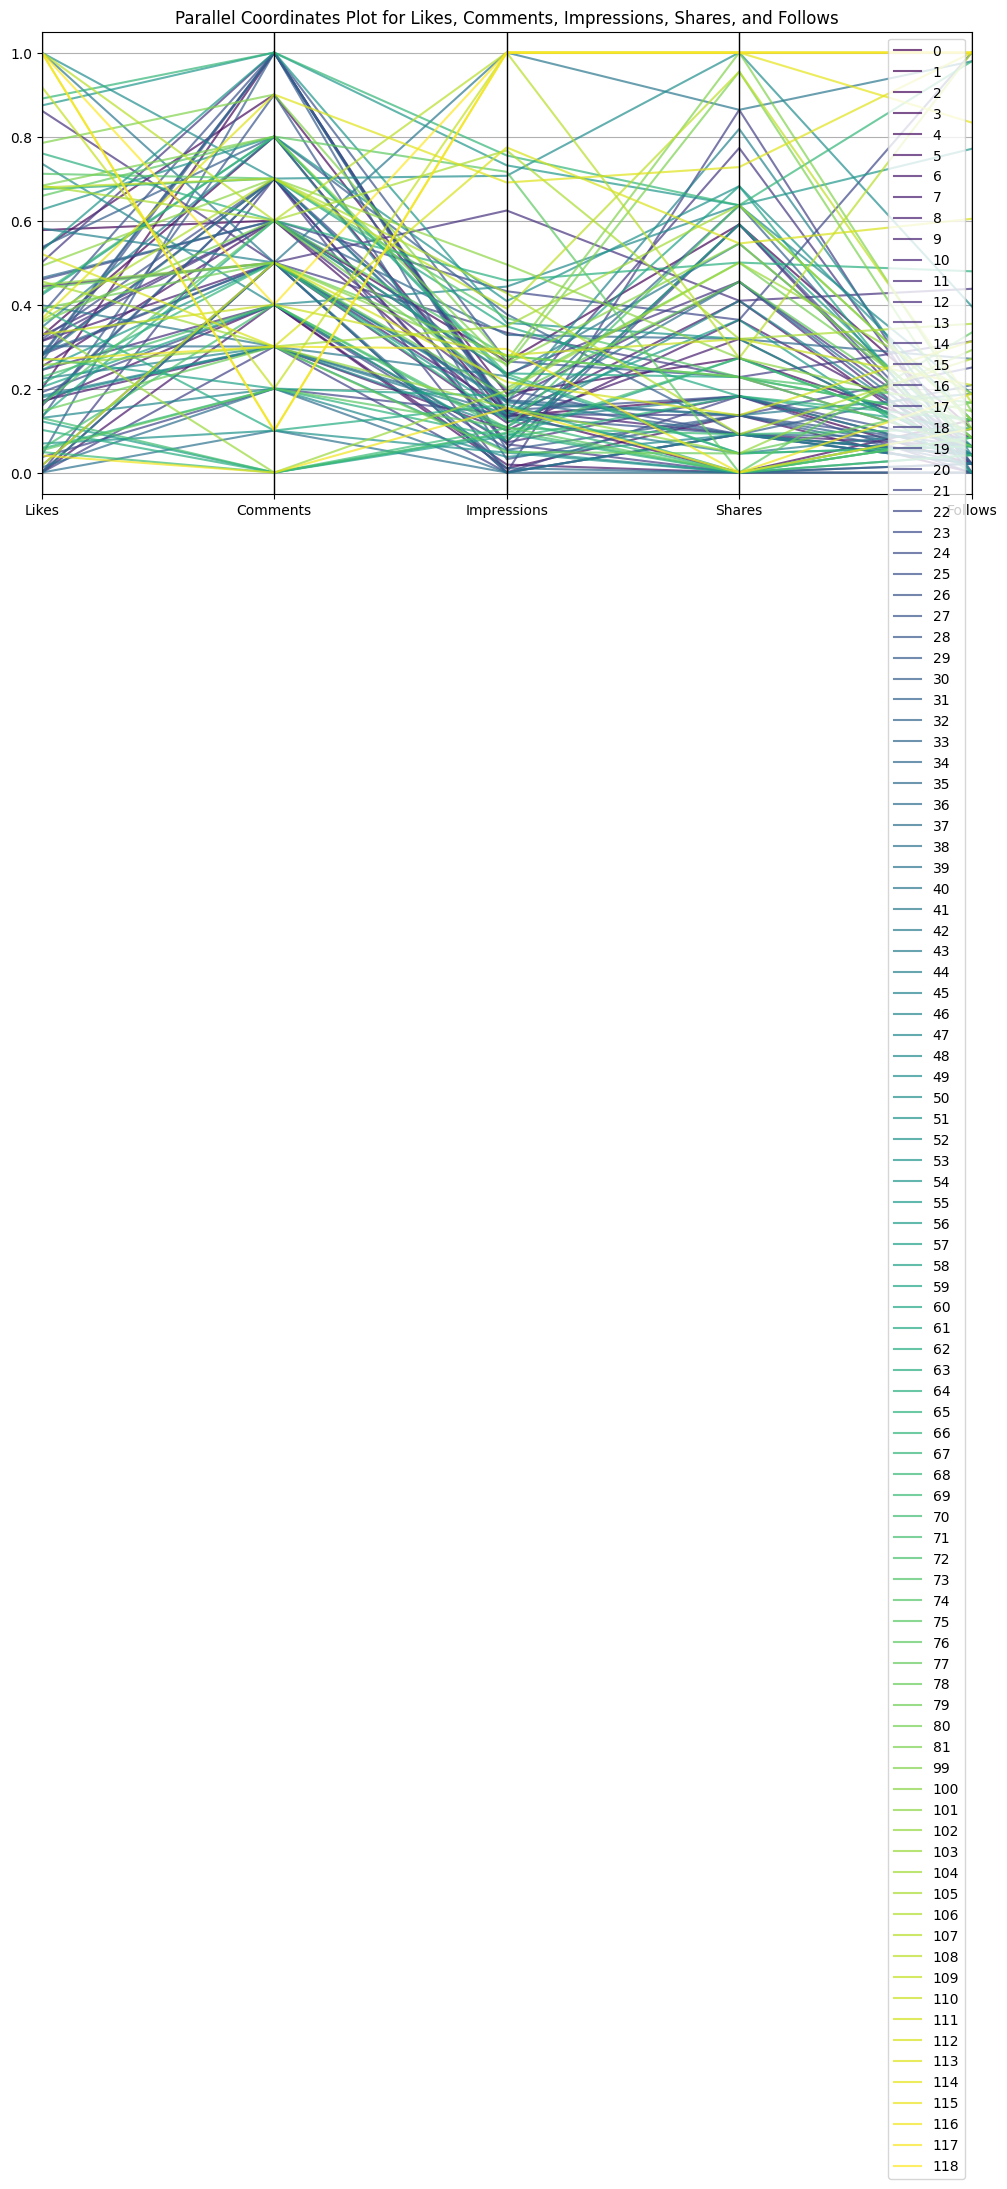

In [86]:
from pandas.plotting import parallel_coordinates

# Select relevant columns for parallel coordinates plot
data_for_parallel_coordinates = df[['Likes', 'Comments', 'Impressions', 'Shares', 'Follows']]

# Normalize the data for better visualization
data_normalized = (data_for_parallel_coordinates - data_for_parallel_coordinates.min()) / (data_for_parallel_coordinates.max() - data_for_parallel_coordinates.min())

# Add the index to the DataFrame for color mapping
data_normalized['Index'] = df.index

# Create a parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(data_normalized, 'Index', colormap='viridis', alpha=0.7)
plt.title('Parallel Coordinates Plot for Likes, Comments, Impressions, Shares, and Follows')
plt.show()


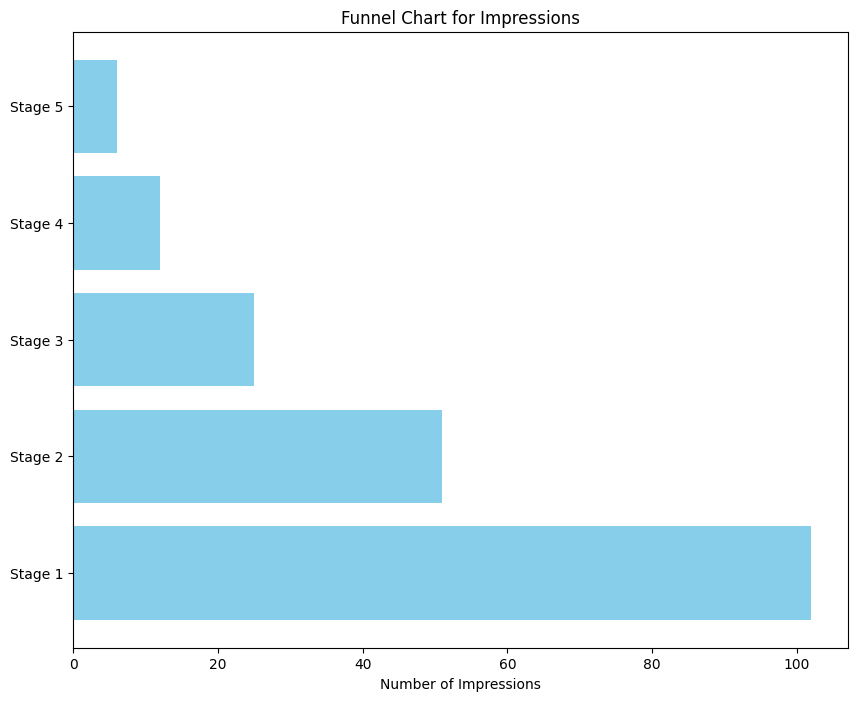

In [87]:
# Sort the data by 'Impressions' in descending order
df_sorted = df.sort_values(by='Impressions', ascending=False)

# Create a list of stages
stages = ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5']

# Calculate the number of items in each stage
items_in_stage = [len(df_sorted) // (2 ** i) for i in range(len(stages))]

# Calculate the cumulative sum of items in each stage
cumulative_items = [sum(items_in_stage[:i+1]) for i in range(len(items_in_stage))]

# Plot the funnel chart
plt.figure(figsize=(10, 8))
plt.barh(stages, items_in_stage, color='skyblue')
plt.xlabel('Number of Impressions')
plt.title('Funnel Chart for Impressions')
plt.show()


In [89]:
# Assuming df is your DataFrame with the required columns
df['Hashtags'] = df['Hashtags'].fillna('')  # Replace NaN values with an empty string for hashtags

# Extract relevant columns
hashtags_caption_df = df[['Hashtags', 'Caption', 'Likes', 'Comments', 'Shares', 'Impressions']]


**Hashtags Analysis:**

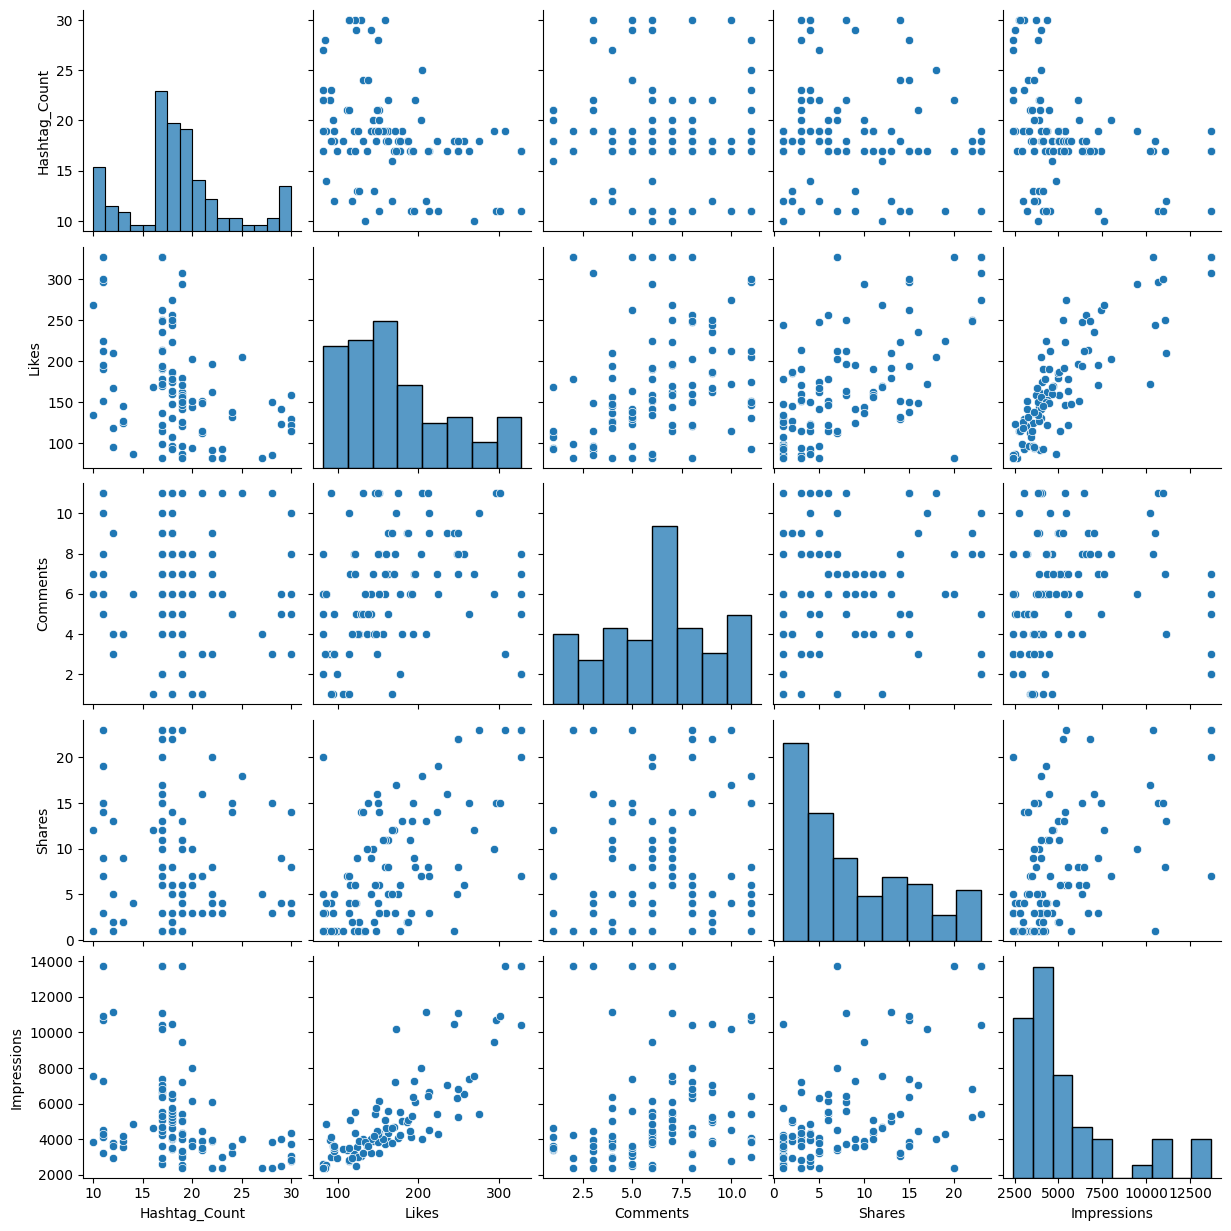

In [90]:
# Count the number of hashtags
df['Hashtag_Count'] = df['Hashtags'].apply(lambda x: len(x.split()) if x != '' else 0)

# Visualize the relationship between hashtag count and engagement metrics
sns.pairplot(df[['Hashtag_Count', 'Likes', 'Comments', 'Shares', 'Impressions']])
plt.show()


In [93]:
# Assuming df is your DataFrame with the required columns
reach_sources_df = df[['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Impressions']]


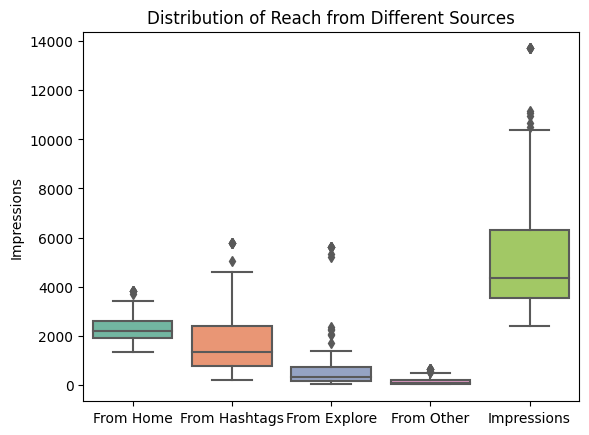

In [94]:
# Visualize the distribution of reach from different sources
sns.boxplot(data=reach_sources_df, palette='Set2')
plt.title('Distribution of Reach from Different Sources')
plt.ylabel('Impressions')
plt.show()


**Statistical Summary:**

In [95]:
# Display statistical summary
reach_sources_df.describe()


,From Home,From Hashtags,From Explore,From Other,Impressions
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,2305.333333,1835.833333,886.794118,158.147059,5420.343137
std,610.542257,1501.463834,1455.972271,177.186672,2959.216151
min,1338.000000,212.000000,45.000000,21.000000,2407.000000
25%,1923.750000,753.000000,178.750000,40.250000,3556.000000
50%,2216.000000,1326.000000,337.000000,75.000000,4343.500000
75%,2605.250000,2415.750000,728.500000,218.500000,6296.250000
max,3813.000000,5799.000000,5634.000000,655.000000,13700.000000


# **User Engagement Metrics:**

In [97]:
# Assuming df is your DataFrame with the required columns
engagement_metrics_df = df[['Follows', 'Impressions', 'Likes', 'Comments', 'Shares']]


<ipython-input-99-e5275cdcbd3e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



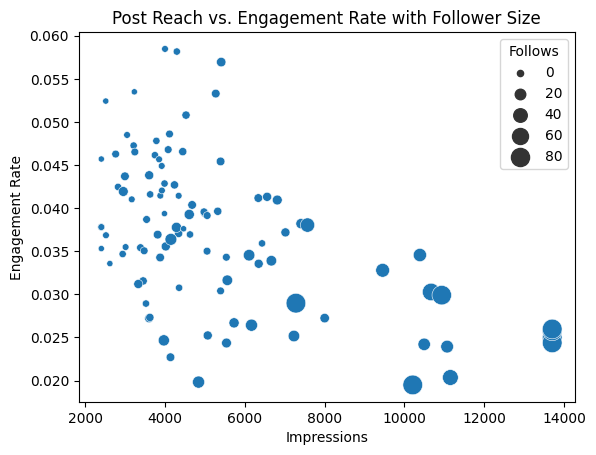

In [99]:
# Calculate engagement rate (you may need to adjust the formula based on your specific metrics)
engagement_metrics_df['Engagement Rate'] = (engagement_metrics_df['Likes'] + engagement_metrics_df['Comments'] + engagement_metrics_df['Shares']) / engagement_metrics_df['Impressions']

# Visualize post reach and engagement rates
sns.scatterplot(x='Impressions', y='Engagement Rate', data=engagement_metrics_df, size='Follows', sizes=(20, 200))
plt.title('Post Reach vs. Engagement Rate with Follower Size')
plt.xlabel('Impressions')
plt.ylabel('Engagement Rate')
plt.show()


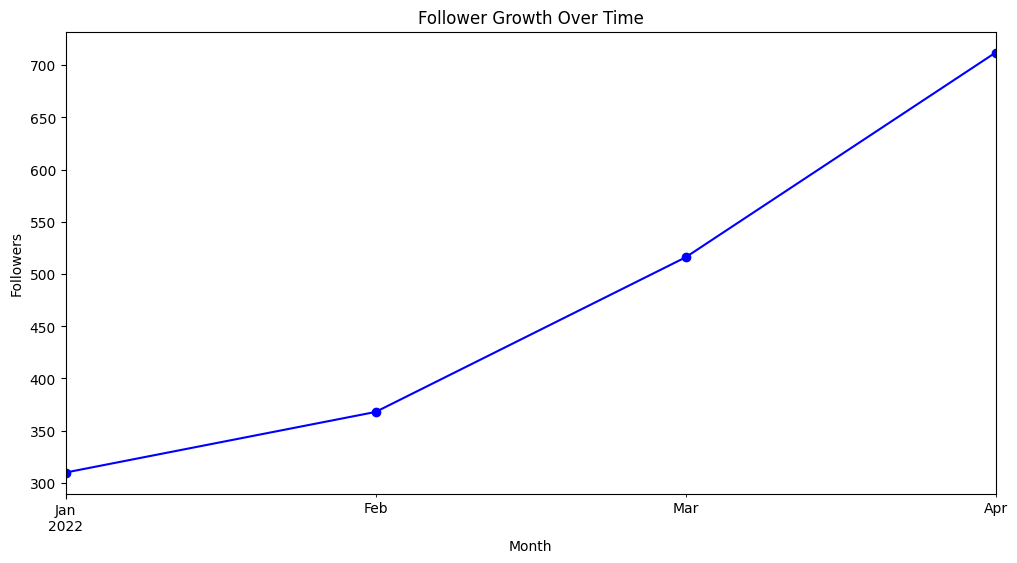

In [100]:

# Create a synthetic datetime index
df.index = pd.date_range(start='2022-01-01', periods=len(df), freq='D')

# Group by month and sum the 'Follows' column
follower_growth_df = df.groupby(df.index.to_period("M"))['Follows'].sum()

# Plot the follower growth over time
plt.figure(figsize=(12, 6))
follower_growth_df.plot(kind='line', marker='o', color='blue')
plt.title('Follower Growth Over Time')
plt.xlabel('Month')
plt.ylabel('Followers')
plt.show()


#  Statistical Analysis:

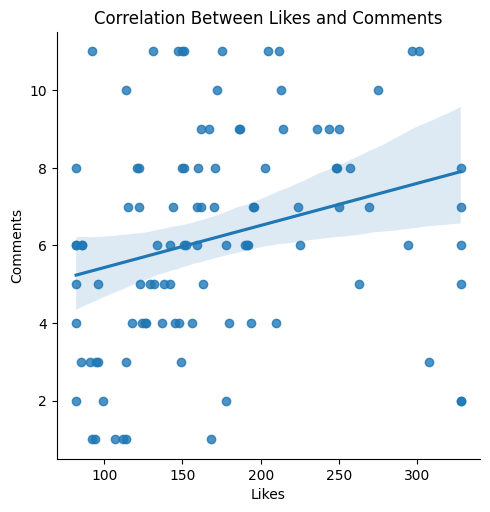

Correlation Coefficient: 0.2655069023474757


In [102]:
# Select relevant columns
selected_columns = ['Likes', 'Comments']

# Create a subset of the data with selected columns
subset_df = df[selected_columns]

# Plot a scatter plot with regression line
sns.lmplot(x='Likes', y='Comments', data=subset_df)
plt.title('Correlation Between Likes and Comments')
plt.show()

# Calculate correlation coefficient
correlation_coefficient = subset_df.corr().loc['Likes', 'Comments']
print(f"Correlation Coefficient: {correlation_coefficient}")
